# Open-Science-prize quantum challenge 2021/22 by Quantum Polo Gang

# Abstract

We decide to split the XXX Hamiltonian into two pieces $H=H_1+H_2$ (instead of 6):
$$    H_1=I^{(0)} \otimes \sigma_x^{(1)} \otimes \sigma_x^{(2)}  + I^{(0)}  \otimes  \sigma_y^{(1)} \otimes \sigma_y^{(2)} + I^{(0)}  \otimes \sigma_z^{(0)} \otimes \sigma_z^{(1)}$$
$$ H_2=\sigma_x^{(0)}\otimes \sigma_x^{(1)} \otimes I^{(2)}  +  \sigma_y^{(0)} \otimes \sigma_y^{(1)} \otimes I^{(2)} + \sigma_z^{(0)} \otimes \sigma_z^{(1)} \otimes I^{(2)}$$

so using Trotter's formula (for a fixed number of steps $N$):
$$ e^{-iHt}=e^{-i(H_1 + H_2)t} \simeq \left(e^{-iH_1\frac{t}{N}}e^{-iH_2\frac{t}{N}}\right)^N \equiv (T_{step})^N \equiv T(t)$$

Our main goal is to find the operator $U_{best}$ for which the number of gates is minimum and for which holds (at all times):

$$U_{best}(t) \ket{110} = T(t) \ket{110}$$

This can be intended in two ways:

* $U_{best} = T$ (equality between operators)
* $U_{best} \neq T$, but the two different operators applied to the same vector yield the same result

We followed both approaches, the former will be called *Hilbert Space Decomposition* (HSD) while for the latter we chose the name of *Single State Decomposition* (SSD).

For HSD the best circuit we found is composed of 11 cnots (14 for the Jakarta geometry) while for the SSD approach we reached an even better 4 cnots solution.

Furthermore, referring to qiskit's measurement error mitigation strategy (*https://qiskit.org/textbook/ch-quantum-hardware/measurement-error-mitigation.html*), we tried to model also the noise introduced by the circuit instead of narrowing down to measurement error only.

# Tomography evaluation

model chosen and results

# 1) Decompositions

## 1.1) Single State Decomposition

We start from observing that the hamiltonian preserves the magnetization of the state:
$$m = \sum_i \sigma_z^{(i)}$$
We want to mimic the 3-qubit gate using two 2-qubit gates in succession, thus the subgates must preserve the magnetization too.
$$U_{best} = \left( \mathbb{I}^{(0)} \otimes M^{(1,2)} \right) \cdot \left( M^{(0,1)} \otimes \mathbb{I}^{(2)}  \right)  $$
We search thus the most general form of a 2-qubit magnetization-preserving gate.
Following *reference*, we know that such an operator has the parametric form:
$$ M(\omega,\theta, \phi) = \left[\begin{matrix}
e^{ - i \theta} & 0 & 0 & 0\\ 
0 & e^{-  i \theta } \cos{\omega } & - e^{-  i \phi} \sin{\omega } & 0\\
0 & e^{ i \phi} \sin{\omega} & e^{ i \theta } \cos{\omega } & 0\\
0 & 0 & 0 & e^{ i \theta }
\end{matrix}\right] $$
and can be decomposed with 2 c-nots.

Fixed the initial state to $\ket{110}$, we have that $M^{(1,2)}M^{(0,1)}\ket{110}$ spans the whole magnetization eigenspace. 
$$U_{best} = \left(  \mathbb{I} \otimes M(\omega_2,\theta_2, \phi_2)\right)     \cdot     \left( M(\omega_1,\theta_1, \phi_1) \otimes \mathbb{I} \right)   $$

So taking: $$T\ket{110} = \alpha \ket{011} + \beta \ket{101} + \gamma \ket{110}$$

and: $$U_{best}\ket{110} = e^{-i(\theta_1+\phi_2)}\sin(\omega_1)\cos(\omega_2) \ket{011} + e^{-i(\theta_1-\phi_2)}\cos(\omega_1)\cos(\omega_2) \ket{101} + e^{i(\theta_1+\phi_2)}\sin(\omega_2)) \ket{110}$$

solving for $\omega_1, \omega_2, \theta_1, \theta_2, \phi_1, \phi_2$ the equations, we get the parameters for the gates $M^{(0,1)}$ and $M^{(1,2)}$.

## Circuits

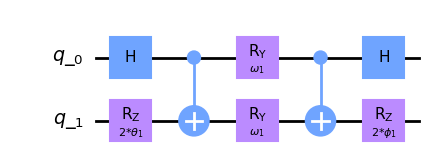

In [43]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter

def get_M(theta, phi, omega, name="M"):

    qr=QuantumRegister(2, name="q_")
    M_qc=QuantumCircuit(qr, name=name)

    M_qc.rz(2*theta,qr[1])
    M_qc.h(qr[0])
    M_qc.cx(qr[0],qr[1])
    M_qc.ry(omega,qr)
    M_qc.cx(qr[0],qr[1])
    M_qc.h(qr[0])
    M_qc.rz(2*phi,qr[1])

    return M_qc

theta_1, phi_1, omega_1  = Parameter(r'$\theta_1$'), Parameter(r'$\phi_1$'), Parameter(r'$\omega_1$')

M1_qc = get_M(theta_1, phi_1, omega_1, name=r"$M_1$")
M1_qc.draw(output="mpl", style={"figwidth":6, "fontsize":11})

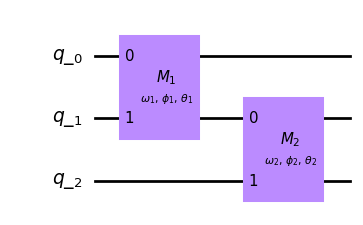

In [40]:
theta_2, phi_2, omega_2  = Parameter(r'$\theta_2$'), Parameter(r'$\phi_2$'), Parameter(r'$\omega_2$')
M2_qc = get_M(theta_2, phi_2, omega_2, name=r"$M_2$")

U_best_qr = QuantumRegister(3, name = "q_")
U_best_qc = QuantumCircuit(U_best_qr, name = r"$U_{best}")

U_best_qc.append(M1_qc, [U_best_qr[0],U_best_qr[1]])
#U_best_qc.barrier()
U_best_qc.append(M2_qc, [U_best_qr[1],U_best_qr[2]])

U_best_qc.draw(output = "mpl", style={"figwidth":5, "fontsize":11})

## 1.2) Hilbert Space Decomposition


## 1.3) 

# 2) circuits